In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [111]:
# Let's import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# For prevent warnings
import warnings
warnings.filterwarnings("ignore")

# Let's load the Dataset

In [112]:
df = pd.read_csv("advertising(Task 3).csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# As Always let's explore the Dataset

In [113]:
# Top 5 rows
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [114]:
# Last 5 rows
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [115]:
# Quick information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [116]:
# Statistical Summary of the Data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [117]:
# Get the shape of the dataset
df.shape

(200, 4)

In [118]:
# Get the size of dataset
df.size

800

# Let's clean the data

In [119]:
# Let's see are there any Nan(null) values in Dataset?
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [120]:
# Let's look for duplicates
df.duplicated().sum()

0

**Since there's no NaN(null) and duplicate value, hence the dataset is already clean**

# EDA(Exploratory Data Analysis)

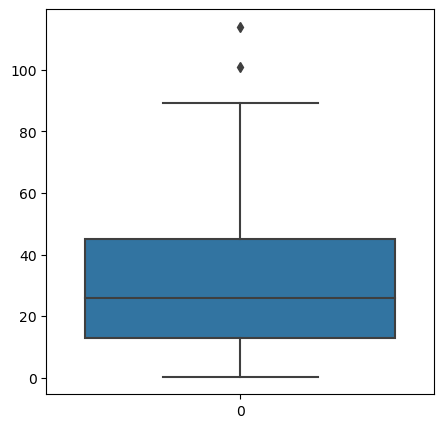

In [121]:
# Outlier Analysis of Newspapaer
plt.figure(figsize=(5,5))
sns.boxplot(df["Newspaper"]);

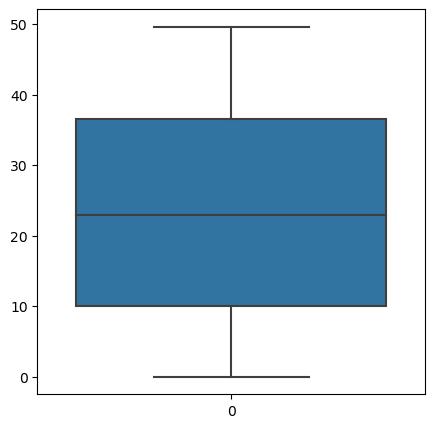

In [122]:
# Outlier Analysis of Radio
plt.figure(figsize=(5,5))
sns.boxplot(df["Radio"]);

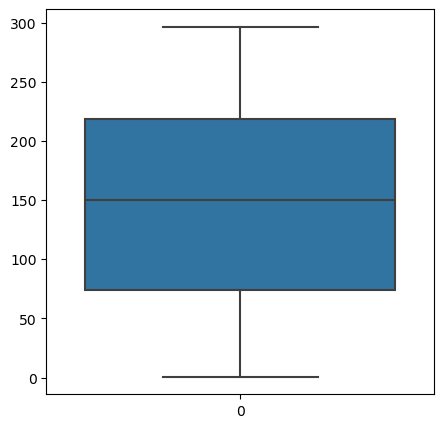

In [123]:
# Outer Analysis of TV
plt.figure(figsize=(5,5))
sns.boxplot(df["TV"]);

## Let's see the sales of the most popular sources of mass-communication

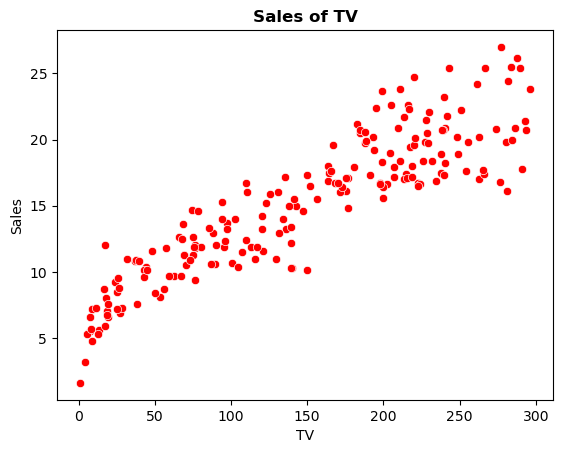

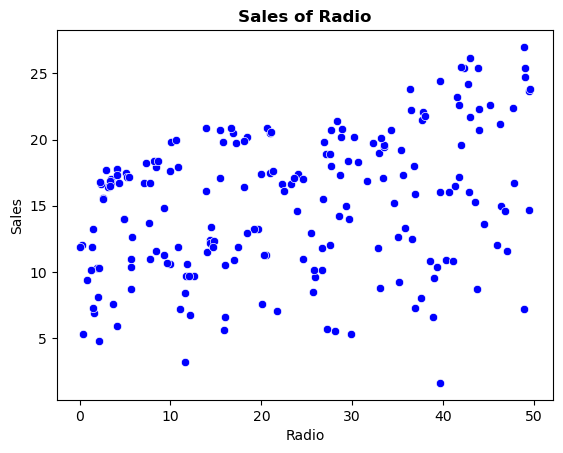

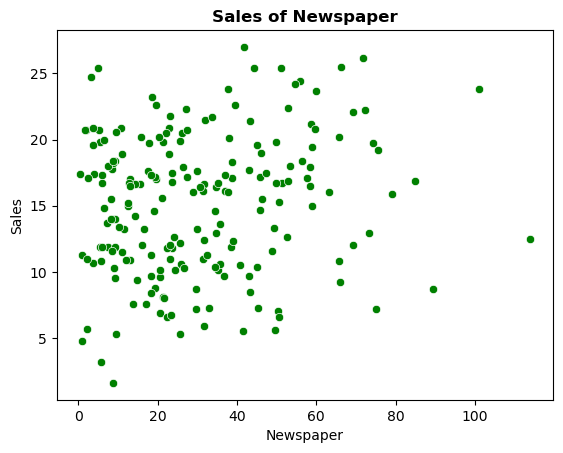

In [124]:
# Sales of TV
sns.scatterplot(x="TV", y="Sales", data=df, color="red")
plt.title("Sales of TV", fontweight="bold")
plt.show()

# Sales of Radio
sns.scatterplot(x="Radio", y="Sales", data=df, color="blue")
plt.title("Sales of Radio", fontweight="bold")
plt.show()

# Sales of Newspaper
sns.scatterplot(x="Newspaper", y="Sales", data=df, color="green")
plt.title("Sales of Newspaper", fontweight="bold")
plt.show()

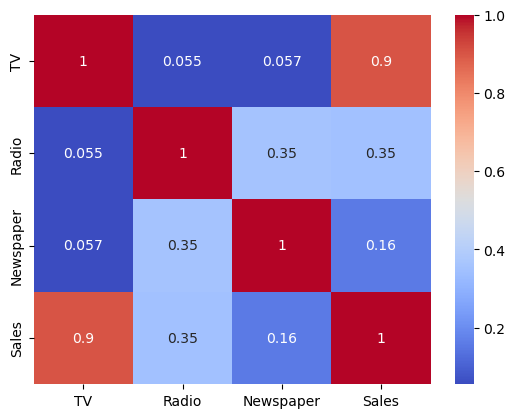

In [125]:
# Let's see the heatmap
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

**From the scatter plot and the heat map , we understood that TV is more corelated with the sales value.**

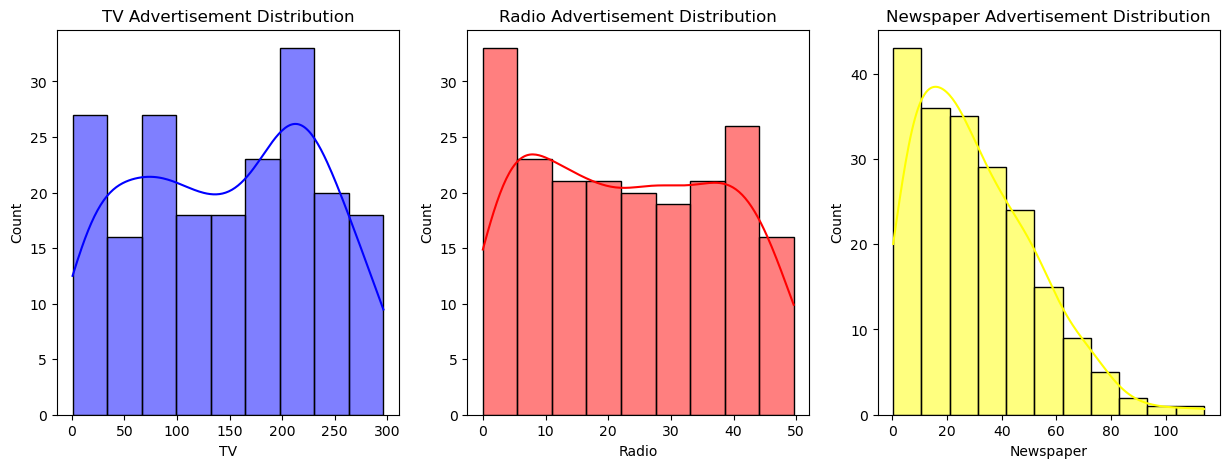

In [126]:
# Histplots(All histplots in a single cell)

# TV histplot
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df["TV"], kde=True, color="blue")
plt.title("TV Advertisement Distribution")

# Radio Histplot
plt.subplot(1,3,2)
sns.histplot(df["Radio"], kde=True, color="red")
plt.title("Radio Advertisement Distribution")

# Newspaper Histplot
plt.subplot(1,3,3)
sns.histplot(df["Newspaper"], kde=True, color="yellow")
plt.title("Newspaper Advertisement Distribution")
plt.show()

## Let's focus on training the model

In [127]:
X = df[["TV", "Newspaper", "Radio"]]
Y = df["Sales"]

###### Train-Test split

In [128]:
# Let's import the 
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [130]:
# Let's have a look on the train dataset

X_train.head()

,TV,Newspaper,Radio
74,213.4,13.1,24.6
3,151.5,58.5,41.3
185,205.0,19.6,45.1
26,142.9,12.6,29.3
90,134.3,9.3,4.9


In [131]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [132]:
# Let's import some more things from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
# Building Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_pred = linear_model.predict(X_test)

In [134]:
#Evaluate Linear Regression Model
linear_mse = mean_squared_error(Y_test, linear_pred)
linear_r2 = r2_score(Y_test, linear_pred)
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression:
Mean Squared Error: 2.6360765623280655
R-squared: 0.8655979373420272


<hr style="height:1px;border-width:0;color:black;background-color:black">

In [135]:
# Building Random forest model
forest_model = RandomForestRegressor()
forest_model.fit(X_train, Y_train)
forest_pred = forest_model.predict(X_test)

In [136]:
# Evaluate Random forest Model
forest_mse = mean_squared_error(Y_test, forest_pred)
forest_r2 = r2_score(Y_test, forest_pred)
print("Random Forest Regression: ")
print(f"Mean Squared Error: {forest_mse}")
print(f"R-squared: {forest_r2}")

Random Forest Regression: 
Mean Squared Error: 1.2621398999999989
R-squared: 0.9356489836649077


<hr style="height:0.5px;border-width:0;color:black;background-color:black">

In [137]:
# Building Gradient Boosting Model
gradient_model = GradientBoostingRegressor()
gradient_model.fit(X_train, Y_train)
gradient_pred = gradient_model.predict(X_test)

In [138]:
# Evaluate Gradient Boosting Model
gradient_mse = mean_squared_error(Y_test, gradient_pred)
gradient_r2 = r2_score(Y_test, gradient_pred)
print("Gradient Boosting Regression")
print(f"Mean Squared Error: {gradient_mse}")
print(f"R_squared: {gradient_r2}")

Gradient Boosting Regression
Mean Squared Error: 1.529725002838648
R_squared: 0.9220059847201811


**We can take the Random Forest model as our chosen model**

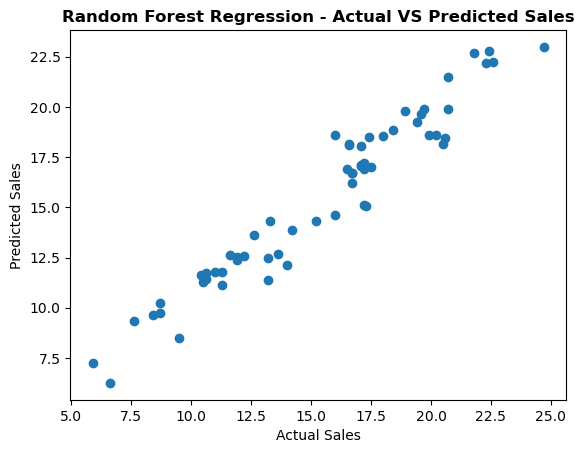

In [139]:
# Let's make a scatter graph by using this gradient boosting model
plt.scatter(Y_test, forest_pred)
plt.title("Random Forest Regression - Actual VS Predicted Sales", fontweight="bold")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# Thank you :)